In [1]:
#Notebook to make Figure 3 of GRL paper: 

#Effect of each EBM experiment on the zonal mean temperature. 

#Simplified from EBM_Gregory_analyze_part2; uses "noG" version of the EBM simulations. 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from voigtColors import voigtColors

In [3]:
ds_GCM = xr.open_dataset('../nc_revised_20181130/master.nc')
ds_GCM_anom = (ds_GCM.sel(exp='Aqua4xCO2')-ds_GCM.sel(exp='AquaControl')).mean(dim='time').mean(dim='lon')

/usr/local/python/anaconda3/envs/pangeo-latest/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [4]:
models = ['AM2', 'CAM3', 'CAM4', 'CNRM-AM6-DIA-v2', 'ECHAM-6.1', 'ECHAM-6.3',
       'IPSL-CM5A', 'MIROC5', 'MPAS', 'MetUM-GA6-CTL', 'MetUM-GA6-ENT',
       'NorESM2']

models_noCNRM = ['AM2', 'CAM3', 'CAM4', 'ECHAM-6.1', 'ECHAM-6.3',
       'IPSL-CM5A', 'MIROC5', 'MPAS', 'MetUM-GA6-CTL', 'MetUM-GA6-ENT',
       'NorESM2']

models_10 = ['AM2', 'CAM3', 'CAM4', 'ECHAM-6.1', 'ECHAM-6.3',
       'IPSL-CM5A', 'MIROC5', 'MPAS', 'MetUM-GA6-CTL', 'MetUM-GA6-ENT']

In [6]:
#Load the EBM results ("noG" version)
EBM_control = xr.open_dataset('nc_from_xarray/EBM_perturb_results_noG_096e4.nc')
EBM_f_inst = xr.open_dataset('nc_from_xarray/EBM_results_noG_f_inst.nc')
EBM_adj_sw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_sw_cloud.nc')
EBM_adj_sw_noncloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_sw_noncloud.nc')
EBM_adj_lw_ta = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_ta.nc')
EBM_adj_lw_wv = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_wv.nc')
EBM_adj_lw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_cloud.nc')
EBM_fb_sw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_sw_cloud.nc')
EBM_fb_sw_noncloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_sw_noncloud.nc')
EBM_fb_lw_wv = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_wv.nc')
EBM_fb_lw_ts = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ts.nc')
EBM_fb_lw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_cloud.nc')
EBM_fb_lw_ta_05p = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_05p.nc')
EBM_fb_lw_ta_10p = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_10p.nc')
EBM_fb_lw_ta_15p = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_15p.nc')

In [7]:
def setuppanel_zonalmean(ax, title, ylabel = 'Temperature anomaly (K)', ylims='default', equator=False, fontsize=12):
    plt.hlines(0, -1, 1, linestyles='dashed') #zero line
    ax.set_xticks([-.866, -.5, 0, .5, .866])
    ax.xaxis.set_ticklabels(['-60$\degree$', '-30$\degree$', '0$\degree$', '30$\degree$', '60$\degree$'])
    ax.tick_params(labelsize=12)
    plt.xlabel('Latitude', fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    ax.set_xlim([-1,1])
    if not ylims=='default':
        ax.set_ylim(ylims)
    if equator:
        plt.vlines(0, ax.get_ylim()[0], ax.get_ylim()[1], linestyles='dashed', linewidth=0.5) 

In [8]:
#Calculations of statistics, etc. before making plot: 
sinlat = np.sin(ds_GCM.lat*np.pi/180.)

#Multi-model means
control_mean = EBM_control['TS_perturb'].mean(dim='model')
mean_f_inst = EBM_f_inst['TS_perturb'].mean(dim='model')
mean_adj_sw_cloud = EBM_adj_sw_cloud['TS_perturb'].mean(dim='model')
mean_adj_sw_noncloud = EBM_adj_sw_noncloud['TS_perturb'].mean(dim='model')
mean_adj_lw_cloud = EBM_adj_lw_cloud['TS_perturb'].mean(dim='model')
mean_adj_lw_wv = EBM_adj_lw_wv['TS_perturb'].mean(dim='model')
mean_adj_lw_ta = EBM_adj_lw_ta['TS_perturb'].mean(dim='model')
mean_fb_sw_cloud = EBM_fb_sw_cloud['TS_perturb'].mean(dim='model')
mean_fb_sw_noncloud = EBM_fb_sw_noncloud['TS_perturb'].mean(dim='model')
mean_fb_lw_cloud = EBM_fb_lw_cloud['TS_perturb'].mean(dim='model')
mean_fb_lw_wv = EBM_fb_lw_wv['TS_perturb'].mean(dim='model')
mean_fb_lw_ta_10p = EBM_fb_lw_ta_10p['TS_perturb'].mean(dim='model')
mean_fb_lw_ts = EBM_fb_lw_ts['TS_perturb'].mean(dim='model') 




In [9]:
#Maxes for spread filling
max_f_inst = EBM_f_inst['TS_perturb'].max(dim='model')
max_adj_sw_cloud = EBM_adj_sw_cloud['TS_perturb'].max(dim='model')
max_adj_sw_noncloud = EBM_adj_sw_noncloud['TS_perturb'].max(dim='model')
max_adj_lw_cloud = EBM_adj_lw_cloud['TS_perturb'].max(dim='model')
max_adj_lw_wv = EBM_adj_lw_wv['TS_perturb'].max(dim='model')
max_adj_lw_ta = EBM_adj_lw_ta['TS_perturb'].max(dim='model')
max_fb_sw_cloud = EBM_fb_sw_cloud['TS_perturb'].max(dim='model')
max_fb_sw_noncloud = EBM_fb_sw_noncloud['TS_perturb'].max(dim='model')
max_fb_lw_cloud = EBM_fb_lw_cloud['TS_perturb'].max(dim='model')
max_fb_lw_wv = EBM_fb_lw_wv['TS_perturb'].max(dim='model')
max_fb_lw_ta_10p = EBM_fb_lw_ta_10p['TS_perturb'].max(dim='model')
max_fb_lw_ts = EBM_fb_lw_ts['TS_perturb'].max(dim='model') 

In [10]:
#Mins 
min_f_inst = EBM_f_inst['TS_perturb'].min(dim='model')
min_adj_sw_cloud = EBM_adj_sw_cloud['TS_perturb'].min(dim='model')
min_adj_sw_noncloud = EBM_adj_sw_noncloud['TS_perturb'].min(dim='model')
min_adj_lw_cloud = EBM_adj_lw_cloud['TS_perturb'].min(dim='model')
min_adj_lw_wv = EBM_adj_lw_wv['TS_perturb'].min(dim='model')
min_adj_lw_ta = EBM_adj_lw_ta['TS_perturb'].min(dim='model')
min_fb_sw_cloud = EBM_fb_sw_cloud['TS_perturb'].min(dim='model')
min_fb_sw_noncloud = EBM_fb_sw_noncloud['TS_perturb'].min(dim='model')
min_fb_lw_cloud = EBM_fb_lw_cloud['TS_perturb'].min(dim='model')
min_fb_lw_wv = EBM_fb_lw_wv['TS_perturb'].min(dim='model')
min_fb_lw_ta_10p = EBM_fb_lw_ta_10p['TS_perturb'].min(dim='model')
min_fb_lw_ts = EBM_fb_lw_ts['TS_perturb'].min(dim='model') 

In [11]:
#Calculate differences from control perturbation temperature to plot on the bottom
diff_f_inst = EBM_f_inst['TS_perturb'] - EBM_control['TS_perturb']
diff_adj_sw_cloud = EBM_adj_sw_cloud['TS_perturb'] - EBM_control['TS_perturb']
diff_adj_sw_noncloud = EBM_adj_sw_noncloud['TS_perturb'] - EBM_control['TS_perturb']
diff_adj_lw_cloud = EBM_adj_lw_cloud['TS_perturb'] - EBM_control['TS_perturb']
diff_adj_lw_wv = EBM_adj_lw_wv['TS_perturb'] - EBM_control['TS_perturb']
diff_adj_lw_ta = EBM_adj_lw_ta['TS_perturb'] - EBM_control['TS_perturb']

In [12]:
diff_fb_sw_cloud = EBM_fb_sw_cloud['TS_perturb'] - EBM_control['TS_perturb']
diff_fb_sw_noncloud = EBM_fb_sw_noncloud['TS_perturb'] - EBM_control['TS_perturb']
diff_fb_lw_cloud = EBM_fb_lw_cloud['TS_perturb'] - EBM_control['TS_perturb']
diff_fb_lw_wv = EBM_fb_lw_wv['TS_perturb'] - EBM_control['TS_perturb']
diff_fb_lw_ta_10p = EBM_fb_lw_ta_10p['TS_perturb'] - EBM_control['TS_perturb']
diff_fb_lw_ts = EBM_fb_lw_ts['TS_perturb'] - EBM_control['TS_perturb']

In [13]:
#Difference means
diff_mean_f_inst = diff_f_inst.mean(dim='model')
diff_mean_adj_sw_cloud = diff_adj_sw_cloud.mean(dim='model')
diff_mean_adj_sw_noncloud = diff_adj_sw_noncloud.mean(dim='model')
diff_mean_adj_lw_cloud = diff_adj_lw_cloud.mean(dim='model')
diff_mean_adj_lw_wv = diff_adj_lw_wv.mean(dim='model')
diff_mean_adj_lw_ta = diff_adj_lw_ta.mean(dim='model')
diff_mean_fb_sw_cloud = diff_fb_sw_cloud.mean(dim='model')
diff_mean_fb_sw_noncloud = diff_fb_sw_noncloud.mean(dim='model')
diff_mean_fb_lw_cloud = diff_fb_lw_cloud.mean(dim='model')
diff_mean_fb_lw_wv = diff_fb_lw_wv.mean(dim='model')
diff_mean_fb_lw_ta_10p = diff_fb_lw_ta_10p.mean(dim='model')
diff_mean_fb_lw_ts = diff_fb_lw_ts.mean(dim='model') 

In [14]:
#Maxes
diff_max_f_inst = diff_f_inst.max(dim='model')
diff_max_adj_sw_cloud = diff_adj_sw_cloud.max(dim='model')
diff_max_adj_sw_noncloud = diff_adj_sw_noncloud.max(dim='model')
diff_max_adj_lw_cloud = diff_adj_lw_cloud.max(dim='model')
diff_max_adj_lw_wv = diff_adj_lw_wv.max(dim='model')
diff_max_adj_lw_ta = diff_adj_lw_ta.max(dim='model')
diff_max_fb_sw_cloud = diff_fb_sw_cloud.max(dim='model')
diff_max_fb_sw_noncloud = diff_fb_sw_noncloud.max(dim='model')
diff_max_fb_lw_cloud = diff_fb_lw_cloud.max(dim='model')
diff_max_fb_lw_wv = diff_fb_lw_wv.max(dim='model')
diff_max_fb_lw_ta_10p = diff_fb_lw_ta_10p.max(dim='model')
diff_max_fb_lw_ts = diff_fb_lw_ts.max(dim='model') 

In [15]:
#Mins
diff_min_f_inst = diff_f_inst.min(dim='model')
diff_min_adj_sw_cloud = diff_adj_sw_cloud.min(dim='model')
diff_min_adj_sw_noncloud = diff_adj_sw_noncloud.min(dim='model')
diff_min_adj_lw_cloud = diff_adj_lw_cloud.min(dim='model')
diff_min_adj_lw_wv = diff_adj_lw_wv.min(dim='model')
diff_min_adj_lw_ta = diff_adj_lw_ta.min(dim='model')
diff_min_fb_sw_cloud = diff_fb_sw_cloud.min(dim='model')
diff_min_fb_sw_noncloud = diff_fb_sw_noncloud.min(dim='model')
diff_min_fb_lw_cloud = diff_fb_lw_cloud.min(dim='model')
diff_min_fb_lw_wv = diff_fb_lw_wv.min(dim='model')
diff_min_fb_lw_ta_10p = diff_fb_lw_ta_10p.min(dim='model')
diff_min_fb_lw_ts = diff_fb_lw_ts.min(dim='model') 

In [16]:
#Colors used in Figure 4--hard code the same ones for each panel, lighter version for spread
colorsEachExp = {'all': 'k', 
                 'no_adj_sw_cloud': 'cornflowerblue', 
                 'no_adj_sw_noncloud': 'turquoise', #water vapor
                 'no_adj_lw_cloud': 'darkblue',
                 'no_adj_lw_wv': 'green',
                 'no_adj_lw_ta': 'red',
                 'no_fb_sw_cloud': 'cornflowerblue',
                 'no_fb_sw_noncloud': 'turquoise',  #water vapor
                 'no_fb_lw_cloud': 'darkblue',
                 'no_fb_lw_wv': 'green',
                 'no_fb_lw_ts': 'coral',
                 'no_fb_lw_ta_05p': [0.4, 0, 0], 
                 'no_fb_lw_ta_10p': [0.6, 0.2, 0.2], 
                 'no_fb_lw_ta_15p': [0.8, 0.4, 0.4]}

In [17]:
#Make the plot
#Show absolute temperature perturbation (possibly "double difference" version below?)
#How many panels? 11 (5 forcings, 6 feedbacks)
#3x4 or 2x6 arrangement--I think 2x6



In [ ]:
plt.figure(figsize=(20,8))

#SW cloud
ax = plt.subplot(2,6,1)
setuppanel_zonalmean(ax, '(a) no SW cloud rapid adjustment', ylims=[-1, 29])
plt.plot(sinlat, control_mean, 'k', linewidth=3)
plt.plot(sinlat, mean_adj_sw_cloud, 'cornflowerblue', linewidth=3)
plt.fill_between(sinlat, max_adj_sw_cloud, min_adj_sw_cloud, color='cornflowerblue', alpha=0.5,zorder=-1)

ax=plt.subplot(2,6,2)
setuppanel_zonalmean(ax, '(b) no SW water vapor adjustment', ylims=[-1, 29])
plt.plot(sinlat, control_mean, 'k', linewidth=3)
plt.plot(sinlat, mean_adj_sw_noncloud, 'turquoise', linewidth=3)
plt.fill_between(sinlat, max_adj_sw_noncloud, min_adj_sw_noncloud, color='turquoise', alpha=0.5,zorder=-1)

ax=plt.subplot(2,6,3)
setuppanel_zonalmean(ax, '(c) no LW cloud adjustment', ylims=[-1, 29])
plt.plot(sinlat, control_mean, 'k', linewidth=3)
plt.plot(sinlat, mean_adj_lw_cloud, 'darkblue', linewidth=3)
plt.fill_between(sinlat, max_adj_lw_cloud, min_adj_lw_cloud, color='darkblue', alpha=0.5,zorder=-1)

ax=plt.subplot(2,6,4)
setuppanel_zonalmean(ax, '(d) no LW water vapor adjustment', ylims=[-1, 29])
plt.plot(sinlat, control_mean, 'k', linewidth=3)
plt.plot(sinlat, mean_adj_lw_wv, 'green', linewidth=3)
plt.fill_between(sinlat, max_adj_lw_wv, min_adj_lw_wv, color='green', alpha=0.5,zorder=-1)

ax=plt.subplot(2,6,5)
setuppanel_zonalmean(ax, '(e) no LW atmos. temp. adjustment', ylims=[-1, 29])
plt.plot(sinlat, control_mean, 'k', linewidth=3)
plt.plot(sinlat, mean_adj_lw_ta, 'red', linewidth=3)
plt.fill_between(sinlat, max_adj_lw_ta, min_adj_lw_ta, color='red', alpha=0.5,zorder=-1)

ax = plt.subplot(2,6,7)
setuppanel_zonalmean(ax, '(f) no SW cloud feedback', ylims=[-1, 29])
plt.plot(sinlat, control_mean, 'k', linewidth=3)
plt.plot(sinlat, mean_fb_sw_cloud, 'cornflowerblue', linewidth=3)
plt.fill_between(sinlat, max_fb_sw_cloud, min_fb_sw_cloud, color='cornflowerblue', alpha=0.5,zorder=-1)

ax=plt.subplot(2,6,8)
setuppanel_zonalmean(ax, '(g) no SW water vapor feedback', ylims=[-1, 29])
plt.plot(sinlat, control_mean, 'k', linewidth=3)
plt.plot(sinlat, mean_fb_sw_noncloud, 'turquoise', linewidth=3)
plt.fill_between(sinlat, max_fb_sw_noncloud, min_fb_sw_noncloud, color='turquoise', alpha=0.5,zorder=-1)

ax=plt.subplot(2,6,9)
setuppanel_zonalmean(ax, '(h) no LW cloud feedback', ylims=[-1, 29])
plt.plot(sinlat, control_mean, 'k', linewidth=3)
plt.plot(sinlat, mean_fb_lw_cloud, 'darkblue', linewidth=3)
plt.fill_between(sinlat, max_fb_lw_cloud, min_fb_lw_cloud, color='darkblue', alpha=0.5,zorder=-1)

ax=plt.subplot(2,6,10)
setuppanel_zonalmean(ax, '(i) no LW water vapor feedback', ylims=[-1, 29])
plt.plot(sinlat, control_mean, 'k', linewidth=3)
plt.plot(sinlat, mean_fb_lw_wv, 'green', linewidth=3)
plt.fill_between(sinlat, max_fb_lw_wv, min_fb_lw_wv, color='green', alpha=0.5,zorder=-1)

ax=plt.subplot(2,6,11)
setuppanel_zonalmean(ax, '(j) - 10% LW atmos. temp. feedback', ylims=[-1, 29])
plt.plot(sinlat, control_mean, 'k', linewidth=3)
plt.plot(sinlat, mean_fb_lw_ta_10p, 'red', linewidth=3)
plt.fill_between(sinlat, max_fb_lw_ta_10p, min_fb_lw_ta_10p, color='red', alpha=0.5,zorder=-1)

ax=plt.subplot(2,6,12)
setuppanel_zonalmean(ax, '(k) no LW surf. temp. feedback', ylims=[-1, 29])
plt.plot(sinlat, control_mean, 'k', linewidth=3)
plt.plot(sinlat, mean_fb_lw_ts, 'coral', linewidth=3)
plt.fill_between(sinlat, max_fb_lw_ts, min_fb_lw_ts, color='coral', alpha=0.5,zorder=-1)

#Hold up, this won't really work because inter-model spread in the control cases is so big...
#How about 1-2 panels showing the effect on the temperature anomaly, and rest of panels showing the responses and 
#spread therein

plt.tight_layout()

plt.savefig('plots/Figure3_absolute_version.pdf')
plt.savefig('plots/Figure3_absolute_version.png')

In [18]:
#OK, well a little more useful with the feedback row included. 
#But maybe version with double differences would still be better? (at least for the spread)

In [19]:
legend_adjustments = ['control', 'Inst. CO$_2$ forcing', 'SW cloud', 'SW water vapor', 'LW cloud', 'LW water vapor', 'LW atmos. temp.']
legend_feedbacks = ['control', 'SW cloud', 'SW water vapor', 'LW cloud', 'LW water vapor', 'LW atmos. temp. (10%)', 'LW surf. temp.']

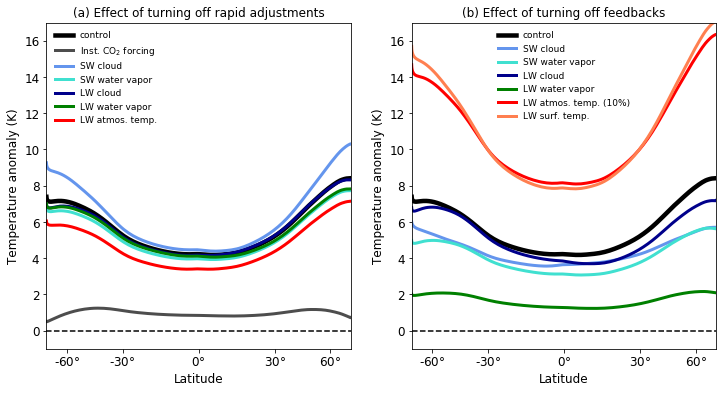

In [20]:
''#Try 3x4 configuration this time
#Actually how about making 2 separate panels that can be combined later (in LaTeX) so they can be 
#different widths
plt.figure(figsize=(12,6))

#Plot the adjustment and feedback effects on the zonal mean temperature all in one panel
#Or one for adjustments, one for feedbacks
ax = plt.subplot(1,2,1)
setuppanel_zonalmean(ax, '(a) Effect of turning off rapid adjustments', ylims=[-1, 17])
plt.plot(sinlat, control_mean, 'k', linewidth=4.5)
plt.plot(sinlat, mean_f_inst, color=[0.3, 0.3, 0.3], linewidth=3)
plt.plot(sinlat, mean_adj_sw_cloud, 'cornflowerblue', linewidth=3)
plt.plot(sinlat, mean_adj_sw_noncloud, 'turquoise', linewidth=3)
plt.plot(sinlat, mean_adj_lw_cloud, 'darkblue', linewidth=3)
plt.plot(sinlat, mean_adj_lw_wv, 'green', linewidth=3)
plt.plot(sinlat, mean_adj_lw_ta, 'red', linewidth=3)

ax.legend(legend_adjustments, frameon=False, loc='upper left', fontsize=9)

ax = plt.subplot(1,2,2)
setuppanel_zonalmean(ax, '(b) Effect of turning off feedbacks', ylims=[-1, 17])
plt.plot(sinlat, control_mean, 'k', linewidth=4.5)
plt.plot(sinlat, mean_fb_sw_cloud, 'cornflowerblue', linewidth=3)
plt.plot(sinlat, mean_fb_sw_noncloud, 'turquoise', linewidth=3)
plt.plot(sinlat, mean_fb_lw_cloud, 'darkblue', linewidth=3)
plt.plot(sinlat, mean_fb_lw_wv, 'green', linewidth=3)
plt.plot(sinlat, mean_fb_lw_ta_10p, 'red', linewidth=3)
plt.plot(sinlat, mean_fb_lw_ts, 'coral', linewidth=3)

ax.legend(legend_feedbacks, frameon=False, loc = 'upper center', fontsize=9)

plt.savefig('plots/Figure_3_top.png')
plt.savefig('plots/Figure_3_top.pdf')

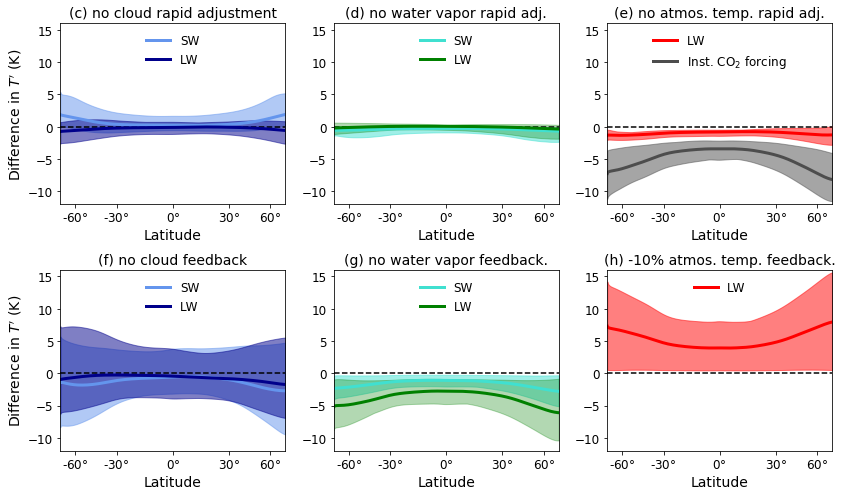

In [24]:
#Bottom part: effect on warming--can I fit this in 8 panels? Or 6: 
#Cloud, water vapor, temperature, combine SW and LW; 
#Top row for adjustments, bottom row for feedbacks?
#Revised version: include instantaneous CO2 forcing, in panel E

plt.figure(figsize=(12,7))

ax = plt.subplot(2,3,1)
setuppanel_zonalmean(ax, '(c) no cloud rapid adjustment', ylims=[-12, 16], fontsize=14)
plt.plot(sinlat, diff_mean_adj_sw_cloud, 'cornflowerblue', linewidth=3)
plt.plot(sinlat, diff_mean_adj_lw_cloud, 'darkblue', linewidth=3)
plt.fill_between(sinlat, diff_max_adj_sw_cloud, diff_min_adj_sw_cloud, color='cornflowerblue', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, diff_max_adj_lw_cloud, diff_min_adj_lw_cloud, color='darkblue', alpha=0.5,zorder=-1)
plt.ylabel('Difference in $T\'$ (K)')
plt.legend(['SW', 'LW'], loc='upper center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,2)
setuppanel_zonalmean(ax, '(d) no water vapor rapid adj.', ylims=[-12, 16], fontsize=14)
plt.plot(sinlat, diff_mean_adj_sw_noncloud, 'turquoise', linewidth=3)
plt.plot(sinlat, diff_mean_adj_lw_wv, 'green', linewidth=3)
plt.fill_between(sinlat, diff_max_adj_sw_noncloud, diff_min_adj_sw_noncloud, color='turquoise', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, diff_max_adj_lw_wv, diff_min_adj_lw_wv, color='green', alpha=0.3,zorder=-1)
plt.ylabel('')
plt.legend(['SW', 'LW'], loc='upper center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,3)
setuppanel_zonalmean(ax, '(e) no atmos. temp. rapid adj.', ylims=[-12, 16], fontsize=14)
plt.plot(sinlat, diff_mean_adj_lw_ta, 'red', linewidth=3)
plt.plot(sinlat, diff_mean_f_inst, color=[0.3, 0.3, 0.3], linewidth=3)
plt.fill_between(sinlat, diff_max_adj_lw_ta, diff_min_adj_lw_ta, color='red', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, diff_max_f_inst, diff_min_f_inst, color=[0.3, 0.3, 0.3], alpha=0.5,zorder=-1)
plt.ylabel('')
plt.legend(['LW', 'Inst. CO$_2$ forcing'], loc='upper center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,4)
setuppanel_zonalmean(ax, '(f) no cloud feedback', ylims=[-12, 16], fontsize=14)
plt.plot(sinlat, diff_mean_fb_sw_cloud, 'cornflowerblue', linewidth=3)
plt.plot(sinlat, diff_mean_fb_lw_cloud, 'darkblue', linewidth=3)
plt.fill_between(sinlat, diff_max_fb_sw_cloud, diff_min_fb_sw_cloud, color='cornflowerblue', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, diff_max_fb_lw_cloud, diff_min_fb_lw_cloud, color='darkblue', alpha=0.5,zorder=-1)
plt.ylabel('Difference in $T\'$ (K)')
plt.legend(['SW', 'LW'], loc='upper center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,5)
setuppanel_zonalmean(ax, '(g) no water vapor feedback.', ylims=[-12, 16], fontsize=14)
plt.plot(sinlat, diff_mean_fb_sw_noncloud, 'turquoise', linewidth=3)
plt.plot(sinlat, diff_mean_fb_lw_wv, 'green', linewidth=3)
plt.fill_between(sinlat, diff_max_fb_sw_noncloud, diff_min_fb_sw_noncloud, color='turquoise', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, diff_max_fb_lw_wv, diff_min_fb_lw_wv, color='green', alpha=0.3,zorder=-1)
plt.ylabel('')
plt.legend(['SW', 'LW'], loc='upper center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,6)
setuppanel_zonalmean(ax, '(h) -10% atmos. temp. feedback.', ylims=[-12, 16], fontsize=14)
plt.plot(sinlat, diff_mean_fb_lw_ta_10p, 'red', linewidth=3)
#plt.plot(sinlat, diff_mean_fb_lw_ts, 'coral', linewidth=3)
plt.fill_between(sinlat, diff_max_fb_lw_ta_10p, diff_min_fb_lw_ta_10p, color='red', alpha=0.5,zorder=-1)
plt.ylabel('')
plt.legend(['LW'], loc='upper center', frameon=False, fontsize=12)

#Don't bother with surface temperature in bottom part, similar to 10% ta and no inter-model spread
plt.tight_layout()

plt.savefig('plots/figure_3_bottom.png')
plt.savefig('plots/figure_3_bottom.pdf')

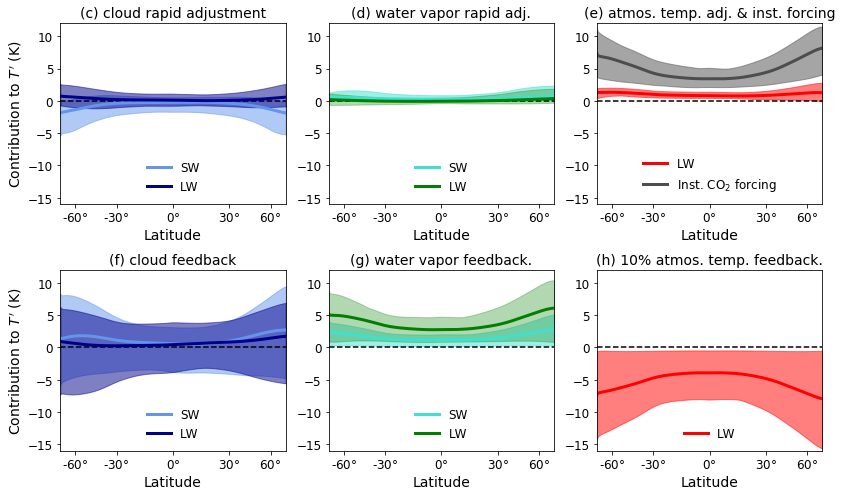

In [29]:
#Version of Figure 3 bottom 6 panels with sign flipped, showing contributions instead of differences

plt.figure(figsize=(12,7))

ax = plt.subplot(2,3,1)
setuppanel_zonalmean(ax, '(c) cloud rapid adjustment', ylims=[-16, 12], fontsize=14)
plt.plot(sinlat, -diff_mean_adj_sw_cloud, 'cornflowerblue', linewidth=3)
plt.plot(sinlat, -diff_mean_adj_lw_cloud, 'darkblue', linewidth=3)
plt.fill_between(sinlat, -diff_max_adj_sw_cloud, -diff_min_adj_sw_cloud, color='cornflowerblue', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, -diff_max_adj_lw_cloud, -diff_min_adj_lw_cloud, color='darkblue', alpha=0.5,zorder=-1)
plt.ylabel('Contribution to $T\'$ (K)')
plt.legend(['SW', 'LW'], loc='lower center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,2)
setuppanel_zonalmean(ax, '(d) water vapor rapid adj.', ylims=[-16, 12], fontsize=14)
plt.plot(sinlat, -diff_mean_adj_sw_noncloud, 'turquoise', linewidth=3)
plt.plot(sinlat, -diff_mean_adj_lw_wv, 'green', linewidth=3)
plt.fill_between(sinlat, -diff_max_adj_sw_noncloud, -diff_min_adj_sw_noncloud, color='turquoise', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, -diff_max_adj_lw_wv, -diff_min_adj_lw_wv, color='green', alpha=0.3,zorder=-1)
plt.ylabel('')
plt.legend(['SW', 'LW'], loc='lower center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,3)
setuppanel_zonalmean(ax, '(e) atmos. temp. adj. & inst. forcing', ylims=[-16, 12], fontsize=14)
plt.plot(sinlat, -diff_mean_adj_lw_ta, 'red', linewidth=3)
plt.plot(sinlat, -diff_mean_f_inst, color=[0.3, 0.3, 0.3], linewidth=3)
plt.fill_between(sinlat, -diff_max_adj_lw_ta, -diff_min_adj_lw_ta, color='red', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, -diff_max_f_inst, -diff_min_f_inst, color=[0.3, 0.3, 0.3], alpha=0.5,zorder=-1)
plt.ylabel('')
plt.legend(['LW', 'Inst. CO$_2$ forcing'], loc='lower center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,4)
setuppanel_zonalmean(ax, '(f) cloud feedback', ylims=[-16, 12], fontsize=14)
plt.plot(sinlat, -diff_mean_fb_sw_cloud, 'cornflowerblue', linewidth=3)
plt.plot(sinlat, -diff_mean_fb_lw_cloud, 'darkblue', linewidth=3)
plt.fill_between(sinlat, -diff_max_fb_sw_cloud, -diff_min_fb_sw_cloud, color='cornflowerblue', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, -diff_max_fb_lw_cloud, -diff_min_fb_lw_cloud, color='darkblue', alpha=0.5,zorder=-1)
plt.ylabel('Contribution to $T\'$ (K)')
plt.legend(['SW', 'LW'], loc='lower center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,5)
setuppanel_zonalmean(ax, '(g) water vapor feedback.', ylims=[-16, 12], fontsize=14)
plt.plot(sinlat, -diff_mean_fb_sw_noncloud, 'turquoise', linewidth=3)
plt.plot(sinlat, -diff_mean_fb_lw_wv, 'green', linewidth=3)
plt.fill_between(sinlat, -diff_max_fb_sw_noncloud, -diff_min_fb_sw_noncloud, color='turquoise', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, -diff_max_fb_lw_wv, -diff_min_fb_lw_wv, color='green', alpha=0.3,zorder=-1)
plt.ylabel('')
plt.legend(['SW', 'LW'], loc='lower center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,6)
setuppanel_zonalmean(ax, '(h) 10% atmos. temp. feedback.', ylims=[-16, 12], fontsize=14)
plt.plot(sinlat, -diff_mean_fb_lw_ta_10p, 'red', linewidth=3)
#plt.plot(sinlat, -diff_mean_fb_lw_ts, 'coral', linewidth=3)
plt.fill_between(sinlat, -diff_max_fb_lw_ta_10p, -diff_min_fb_lw_ta_10p, color='red', alpha=0.5,zorder=-1)
plt.ylabel('')
plt.legend(['LW'], loc='lower center', frameon=False, fontsize=12)

#Don't bother with surface temperature in bottom part, similar to 10% ta and no inter-model spread
plt.tight_layout()

plt.savefig('plots/figure_3_bottom_contrib.png')
plt.savefig('plots/figure_3_bottom_contrib.pdf')

In [ ]:
#What if instead of shading, just plotted individual curves (like I did before) but all same color? 
#Probably too ugly/too much info

In [30]:

#####   DRY EBM RUNS   #####


In [31]:
#Load the EBM results ("noQ" version)
EBM_control_noQ = xr.open_dataset('nc_from_xarray/EBM_perturb_results_noQ_096e4.nc')
EBM_f_inst_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_f_inst.nc')
EBM_adj_sw_cloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_adj_sw_cloud.nc')
EBM_adj_sw_noncloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_adj_sw_noncloud.nc')
EBM_adj_lw_ta_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_adj_lw_ta.nc')
EBM_adj_lw_wv_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_adj_lw_wv.nc')
EBM_adj_lw_cloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_adj_lw_cloud.nc')
EBM_fb_sw_cloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_sw_cloud.nc')
EBM_fb_sw_noncloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_sw_noncloud.nc')
EBM_fb_lw_wv_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_lw_wv.nc')
EBM_fb_lw_ts_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_lw_ts.nc')
EBM_fb_lw_cloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_lw_cloud.nc')
EBM_fb_lw_ta_10p_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_lw_ta_10p.nc')
#no 5p or 15p

In [33]:
#Multi-model means (temperature perturbation)
control_mean_noQ = EBM_control_noQ['TS_perturb'].mean(dim='model')
mean_f_inst_noQ = EBM_f_inst_noQ['TS_perturb'].mean(dim='model')
mean_adj_sw_cloud_noQ = EBM_adj_sw_cloud_noQ['TS_perturb'].mean(dim='model')
mean_adj_sw_noncloud_noQ = EBM_adj_sw_noncloud_noQ['TS_perturb'].mean(dim='model')
mean_adj_lw_cloud_noQ = EBM_adj_lw_cloud_noQ['TS_perturb'].mean(dim='model')
mean_adj_lw_wv_noQ = EBM_adj_lw_wv_noQ['TS_perturb'].mean(dim='model')
mean_adj_lw_ta_noQ = EBM_adj_lw_ta_noQ['TS_perturb'].mean(dim='model')
mean_fb_sw_cloud_noQ = EBM_fb_sw_cloud_noQ['TS_perturb'].mean(dim='model')
mean_fb_sw_noncloud_noQ = EBM_fb_sw_noncloud_noQ['TS_perturb'].mean(dim='model')
mean_fb_lw_cloud_noQ = EBM_fb_lw_cloud_noQ['TS_perturb'].mean(dim='model')
mean_fb_lw_wv_noQ = EBM_fb_lw_wv_noQ['TS_perturb'].mean(dim='model')
mean_fb_lw_ta_10p_noQ = EBM_fb_lw_ta_10p_noQ['TS_perturb'].mean(dim='model')
mean_fb_lw_ts_noQ = EBM_fb_lw_ts_noQ['TS_perturb'].mean(dim='model') 


In [34]:
#Calculate differences from control perturbation temperature to plot on the bottom
diff_f_inst_noQ = EBM_f_inst_noQ['TS_perturb']-EBM_control_noQ['TS_perturb']

diff_adj_sw_cloud_noQ = EBM_adj_sw_cloud_noQ['TS_perturb'] - EBM_control_noQ['TS_perturb']
diff_adj_sw_noncloud_noQ = EBM_adj_sw_noncloud_noQ['TS_perturb'] - EBM_control_noQ['TS_perturb']
diff_adj_lw_cloud_noQ = EBM_adj_lw_cloud_noQ['TS_perturb'] - EBM_control_noQ['TS_perturb']
diff_adj_lw_wv_noQ = EBM_adj_lw_wv_noQ['TS_perturb'] - EBM_control_noQ['TS_perturb']
diff_adj_lw_ta_noQ = EBM_adj_lw_ta_noQ['TS_perturb'] - EBM_control_noQ['TS_perturb']

diff_fb_sw_cloud_noQ = EBM_fb_sw_cloud_noQ['TS_perturb'] - EBM_control_noQ['TS_perturb']
diff_fb_sw_noncloud_noQ = EBM_fb_sw_noncloud_noQ['TS_perturb'] - EBM_control_noQ['TS_perturb']
diff_fb_lw_cloud_noQ = EBM_fb_lw_cloud_noQ['TS_perturb'] - EBM_control_noQ['TS_perturb']
diff_fb_lw_wv_noQ = EBM_fb_lw_wv_noQ['TS_perturb'] - EBM_control_noQ['TS_perturb']
diff_fb_lw_ta_10p_noQ = EBM_fb_lw_ta_10p_noQ['TS_perturb'] - EBM_control_noQ['TS_perturb']
diff_fb_lw_ts_noQ = EBM_fb_lw_ts_noQ['TS_perturb'] - EBM_control_noQ['TS_perturb']

In [35]:
#Difference means
diff_mean_f_inst_noQ = diff_f_inst_noQ.mean(dim='model')
diff_mean_adj_sw_cloud_noQ = diff_adj_sw_cloud_noQ.mean(dim='model')
diff_mean_adj_sw_noncloud_noQ = diff_adj_sw_noncloud_noQ.mean(dim='model')
diff_mean_adj_lw_cloud_noQ = diff_adj_lw_cloud_noQ.mean(dim='model')
diff_mean_adj_lw_wv_noQ = diff_adj_lw_wv_noQ.mean(dim='model')
diff_mean_adj_lw_ta_noQ = diff_adj_lw_ta_noQ.mean(dim='model')
diff_mean_fb_sw_cloud_noQ = diff_fb_sw_cloud_noQ.mean(dim='model')
diff_mean_fb_sw_noncloud_noQ = diff_fb_sw_noncloud_noQ.mean(dim='model')
diff_mean_fb_lw_cloud_noQ = diff_fb_lw_cloud_noQ.mean(dim='model')
diff_mean_fb_lw_wv_noQ = diff_fb_lw_wv_noQ.mean(dim='model')
diff_mean_fb_lw_ta_10p_noQ = diff_fb_lw_ta_10p_noQ.mean(dim='model')
diff_mean_fb_lw_ts_noQ = diff_fb_lw_ts_noQ.mean(dim='model') 

#Maxes
diff_max_f_inst_noQ = diff_f_inst_noQ.max(dim='model')
diff_max_adj_sw_cloud_noQ = diff_adj_sw_cloud_noQ.max(dim='model')
diff_max_adj_sw_noncloud_noQ = diff_adj_sw_noncloud_noQ.max(dim='model')
diff_max_adj_lw_cloud_noQ = diff_adj_lw_cloud_noQ.max(dim='model')
diff_max_adj_lw_wv_noQ = diff_adj_lw_wv_noQ.max(dim='model')
diff_max_adj_lw_ta_noQ = diff_adj_lw_ta_noQ.max(dim='model')
diff_max_fb_sw_cloud_noQ = diff_fb_sw_cloud_noQ.max(dim='model')
diff_max_fb_sw_noncloud_noQ = diff_fb_sw_noncloud_noQ.max(dim='model')
diff_max_fb_lw_cloud_noQ = diff_fb_lw_cloud_noQ.max(dim='model')
diff_max_fb_lw_wv_noQ = diff_fb_lw_wv_noQ.max(dim='model')
diff_max_fb_lw_ta_10p_noQ = diff_fb_lw_ta_10p_noQ.max(dim='model')
diff_max_fb_lw_ts_noQ = diff_fb_lw_ts_noQ.max(dim='model') 

#Mins
diff_min_f_inst_noQ = diff_f_inst_noQ.min(dim='model')
diff_min_adj_sw_cloud_noQ = diff_adj_sw_cloud_noQ.min(dim='model')
diff_min_adj_sw_noncloud_noQ = diff_adj_sw_noncloud_noQ.min(dim='model')
diff_min_adj_lw_cloud_noQ = diff_adj_lw_cloud_noQ.min(dim='model')
diff_min_adj_lw_wv_noQ = diff_adj_lw_wv_noQ.min(dim='model')
diff_min_adj_lw_ta_noQ = diff_adj_lw_ta_noQ.min(dim='model')
diff_min_fb_sw_cloud_noQ = diff_fb_sw_cloud_noQ.min(dim='model')
diff_min_fb_sw_noncloud_noQ = diff_fb_sw_noncloud_noQ.min(dim='model')
diff_min_fb_lw_cloud_noQ = diff_fb_lw_cloud_noQ.min(dim='model')
diff_min_fb_lw_wv_noQ = diff_fb_lw_wv_noQ.min(dim='model')
diff_min_fb_lw_ta_10p_noQ = diff_fb_lw_ta_10p_noQ.min(dim='model')
diff_min_fb_lw_ts_noQ = diff_fb_lw_ts_noQ.min(dim='model') 

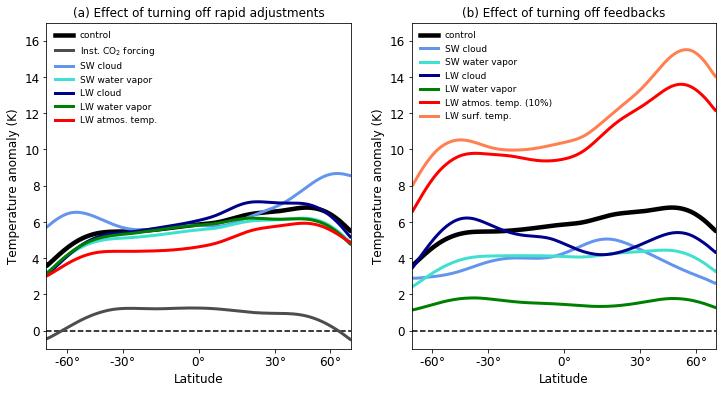

In [37]:
#Figures 3ab--dry version
plt.figure(figsize=(12,6))

#Plot the adjustment and feedback effects on the zonal mean temperature all in one panel
#Or one for adjustments, one for feedbacks
ax = plt.subplot(1,2,1)
setuppanel_zonalmean(ax, '(a) Effect of turning off rapid adjustments', ylims=[-1, 17])
plt.plot(sinlat, control_mean_noQ, 'k', linewidth=4.5)
plt.plot(sinlat, mean_f_inst_noQ, color=[0.3, 0.3, 0.3], linewidth=3)
plt.plot(sinlat, mean_adj_sw_cloud_noQ, 'cornflowerblue', linewidth=3)
plt.plot(sinlat, mean_adj_sw_noncloud_noQ, 'turquoise', linewidth=3)
plt.plot(sinlat, mean_adj_lw_cloud_noQ, 'darkblue', linewidth=3)
plt.plot(sinlat, mean_adj_lw_wv_noQ, 'green', linewidth=3)
plt.plot(sinlat, mean_adj_lw_ta_noQ, 'red', linewidth=3)

ax.legend(legend_adjustments, frameon=False, loc='upper left', fontsize=9)

ax = plt.subplot(1,2,2)
setuppanel_zonalmean(ax, '(b) Effect of turning off feedbacks', ylims=[-1, 17])
plt.plot(sinlat, control_mean_noQ, 'k', linewidth=4.5)
plt.plot(sinlat, mean_fb_sw_cloud_noQ, 'cornflowerblue', linewidth=3)
plt.plot(sinlat, mean_fb_sw_noncloud_noQ, 'turquoise', linewidth=3)
plt.plot(sinlat, mean_fb_lw_cloud_noQ, 'darkblue', linewidth=3)
plt.plot(sinlat, mean_fb_lw_wv_noQ, 'green', linewidth=3)
plt.plot(sinlat, mean_fb_lw_ta_10p_noQ, 'red', linewidth=3)
plt.plot(sinlat, mean_fb_lw_ts_noQ, 'coral', linewidth=3)

ax.legend(legend_feedbacks, frameon=False, loc = 'upper left', fontsize=9)

plt.savefig('plots/Figure_3_top_noQ.png')
plt.savefig('plots/Figure_3_top_noQ.pdf')

In [ ]:
#Whoa----much less polar amplification, indeed tropical amplification for most experiments, when moisture transport turned off. 

In [ ]:
#Bottom 6 panels
#Bottom part: effect on warming--can I fit this in 8 panels? Or 6: 
#Cloud, water vapor, temperature, combine SW and LW; 
#Top row for adjustments, bottom row for feedbacks?

plt.figure(figsize=(12,7))

ax = plt.subplot(2,3,1)
setuppanel_zonalmean(ax, '(c) no cloud rapid adjustment', ylims=[-3, 6], fontsize=14)
plt.plot(sinlat, diff_mean_adj_sw_cloud_noQ, 'cornflowerblue', linewidth=3)
plt.plot(sinlat, diff_mean_adj_lw_cloud_noQ, 'darkblue', linewidth=3)
plt.fill_between(sinlat, diff_max_adj_sw_cloud_noQ, diff_min_adj_sw_cloud_noQ, color='cornflowerblue', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, diff_max_adj_lw_cloud_noQ, diff_min_adj_lw_cloud_noQ, color='darkblue', alpha=0.5,zorder=-1)
plt.ylabel('Difference in $T\'$ (K)')
plt.legend(['SW', 'LW'], loc='upper center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,2)
setuppanel_zonalmean(ax, '(d) no water vapor rapid adj.', ylims=[-3, 6], fontsize=14)
plt.plot(sinlat, diff_mean_adj_sw_noncloud_noQ, 'turquoise', linewidth=3)
plt.plot(sinlat, diff_mean_adj_lw_wv_noQ, 'green', linewidth=3)
plt.fill_between(sinlat, diff_max_adj_sw_noncloud_noQ, diff_min_adj_sw_noncloud_noQ, color='turquoise', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, diff_max_adj_lw_wv_noQ, diff_min_adj_lw_wv_noQ, color='green', alpha=0.3,zorder=-1)
plt.ylabel('')
plt.legend(['SW', 'LW'], loc='upper center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,3)
setuppanel_zonalmean(ax, '(e) no atmos. temp. rapid adj.', ylims=[-3, 6], fontsize=14)
plt.plot(sinlat, diff_mean_adj_lw_ta_noQ, 'red', linewidth=3)
plt.fill_between(sinlat, diff_max_adj_lw_ta_noQ, diff_min_adj_lw_ta_noQ, color='red', alpha=0.5,zorder=-1)
plt.ylabel('')
plt.legend(['LW'], loc='upper center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,4)
setuppanel_zonalmean(ax, '(f) no cloud feedback', ylims=[-12, 16], fontsize=14)
plt.plot(sinlat, diff_mean_fb_sw_cloud_noQ, 'cornflowerblue', linewidth=3)
plt.plot(sinlat, diff_mean_fb_lw_cloud_noQ, 'darkblue', linewidth=3)
plt.fill_between(sinlat, diff_max_fb_sw_cloud_noQ, diff_min_fb_sw_cloud_noQ, color='cornflowerblue', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, diff_max_fb_lw_cloud_noQ, diff_min_fb_lw_cloud_noQ, color='darkblue', alpha=0.5,zorder=-1)
plt.ylabel('Difference in $T\'$ (K)')
plt.legend(['SW', 'LW'], loc='upper center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,5)
setuppanel_zonalmean(ax, '(g) no water vapor feedback.', ylims=[-12, 16], fontsize=14)
plt.plot(sinlat, diff_mean_fb_sw_noncloud_noQ, 'turquoise', linewidth=3)
plt.plot(sinlat, diff_mean_fb_lw_wv_noQ, 'green', linewidth=3)
plt.fill_between(sinlat, diff_max_fb_sw_noncloud_noQ, diff_min_fb_sw_noncloud_noQ, color='turquoise', alpha=0.5,zorder=-1)
plt.fill_between(sinlat, diff_max_fb_lw_wv_noQ, diff_min_fb_lw_wv_noQ, color='green', alpha=0.3,zorder=-1)
plt.ylabel('')
plt.legend(['SW', 'LW'], loc='upper center', frameon=False, fontsize=12)

ax = plt.subplot(2,3,6)
setuppanel_zonalmean(ax, '(h) -10% atmos. temp. feedback.', ylims=[-12, 16], fontsize=14)
plt.plot(sinlat, diff_mean_fb_lw_ta_10p_noQ, 'red', linewidth=3)
#plt.plot(sinlat, diff_mean_fb_lw_ts, 'coral', linewidth=3)
plt.fill_between(sinlat, diff_max_fb_lw_ta_10p_noQ, diff_min_fb_lw_ta_10p_noQ, color='red', alpha=0.5,zorder=-1)
plt.ylabel('')
plt.legend(['LW'], loc='upper center', frameon=False, fontsize=12)

#Don't bother with surface temperature in bottom part, similar to 10% ta and no inter-model spread
plt.tight_layout()

plt.savefig('plots/figure_3_bottom_noQ.png')
plt.savefig('plots/figure_3_bottom_noQ.pdf')